In [14]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [15]:
data = uproot.open('data/ttjjresult.root')

In [16]:
events = data['mytree']

In [17]:
events.keys()

['nbtag', 'njet', 'ht', 'met', 'pt5', 'pt6']

In [18]:
njet, ht, pt6 = events.arrays(['njet', 'ht', 'pt6'], library='np', how=tuple) #can also choose different variable

In [19]:
htcut = [700, 2000] #define region of interest
pt6cut = [40, 100]

binsize = 6
htbin = np.linspace(*htcut, binsize+1) #define appropriate bin size
ptbin = np.linspace(*pt6cut, binsize+1)

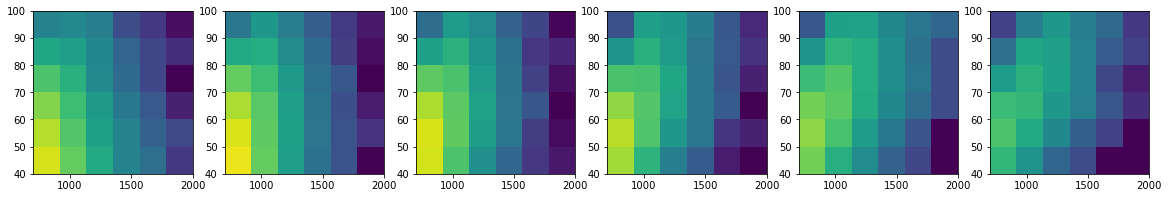

In [20]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3))

for njetcut in np.arange(6, 12):
    
    total_region = (ht>htcut[0])&(ht<htcut[1])&(pt6>pt6cut[0])&(pt6<pt6cut[1])&(njet>njetcut)&(njet<njetcut+2)
    ax[njetcut-6].hist2d(ht[total_region], pt6[total_region], norm=colors.LogNorm(vmax = 5e03), bins=[htbin,ptbin])[0]

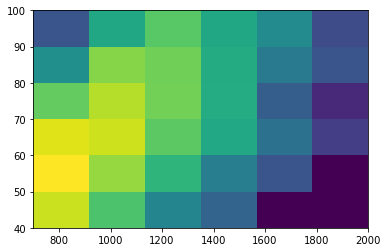

In [23]:
crlist = np.array([])
for njetcut in np.arange(6, 12):
    
    ht_norm = np.linspace(0,1,binsize)
    pt_norm = np.linspace(0,1,binsize)
    ptgrid, htgrid = np.meshgrid(pt_norm, ht_norm)
    njetgrid = np.full(ptgrid.shape, (njetcut-6)/5)
    
    total_region = (ht>htcut[0])&(ht<htcut[1])&(pt6>pt6cut[0])&(pt6<pt6cut[1])&(njet>njetcut)&(njet<njetcut+2)
    grid = plt.hist2d(ht[total_region], pt6[total_region], norm=colors.LogNorm(), bins=[htbin,ptbin])
    arr = np.array([njetgrid, ptgrid, htgrid, grid[0]]).T
    
    crlist = np.append(crlist, arr).reshape((-1, 4))

In [ ]:
crlist

In [101]:
np.save('data/htpt_3d_40to100', crlist) #save histogram